# The convolution sum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

## Calculating convolution for mode = 'full'

In [2]:
x1 = np.array([1,2,2,1,1])
n1 = np.array([0,1,2,3,4])

x2 = np.array([3,2,1])
n2 = np.array([0,1,2])

# Convolution by np.convolve using mode = "full"

In [3]:
np.convolve(x1,x2,mode = 'full')

array([ 3,  8, 11,  9,  7,  3,  1])

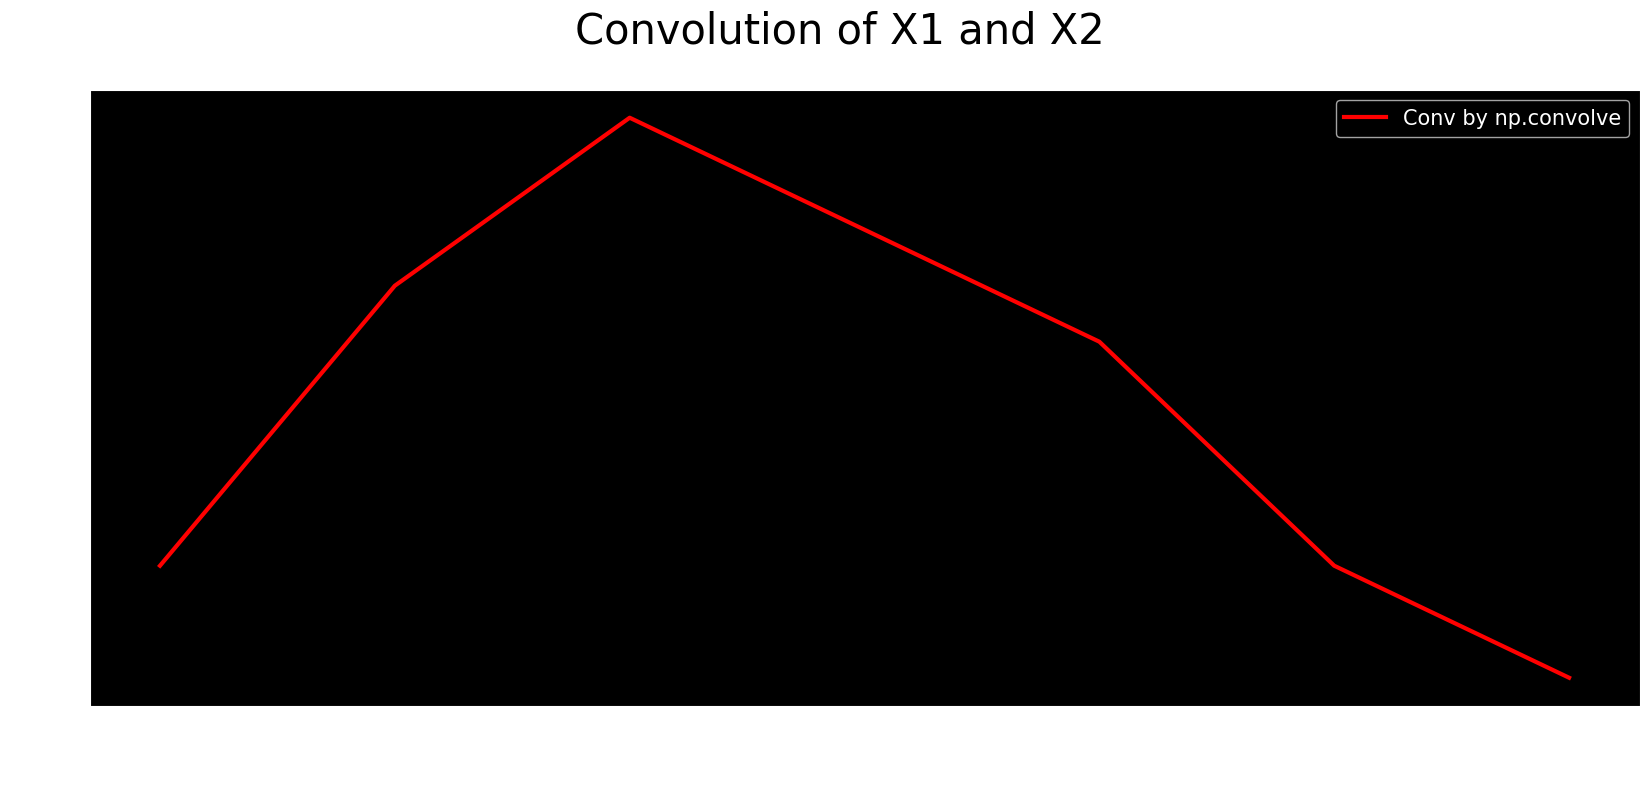

In [4]:
# Plotting Convolution
plt.figure(figsize = (20,8)) # set the size of figure
plt.suptitle('Convolution of X1 and X2', fontsize = 30)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(np.convolve(x1,x2, mode = 'full'), 'r-', linewidth =3,label = 'Conv by np.convolve')
plt.xlabel('Sample', fontsize = 15)
plt.ylabel('Value', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Convolution by np.convolve using mode = "same"

In [5]:
# Convolution by np.convolve

np.convolve(x1,x2, mode = 'same')

array([ 8, 11,  9,  7,  3])

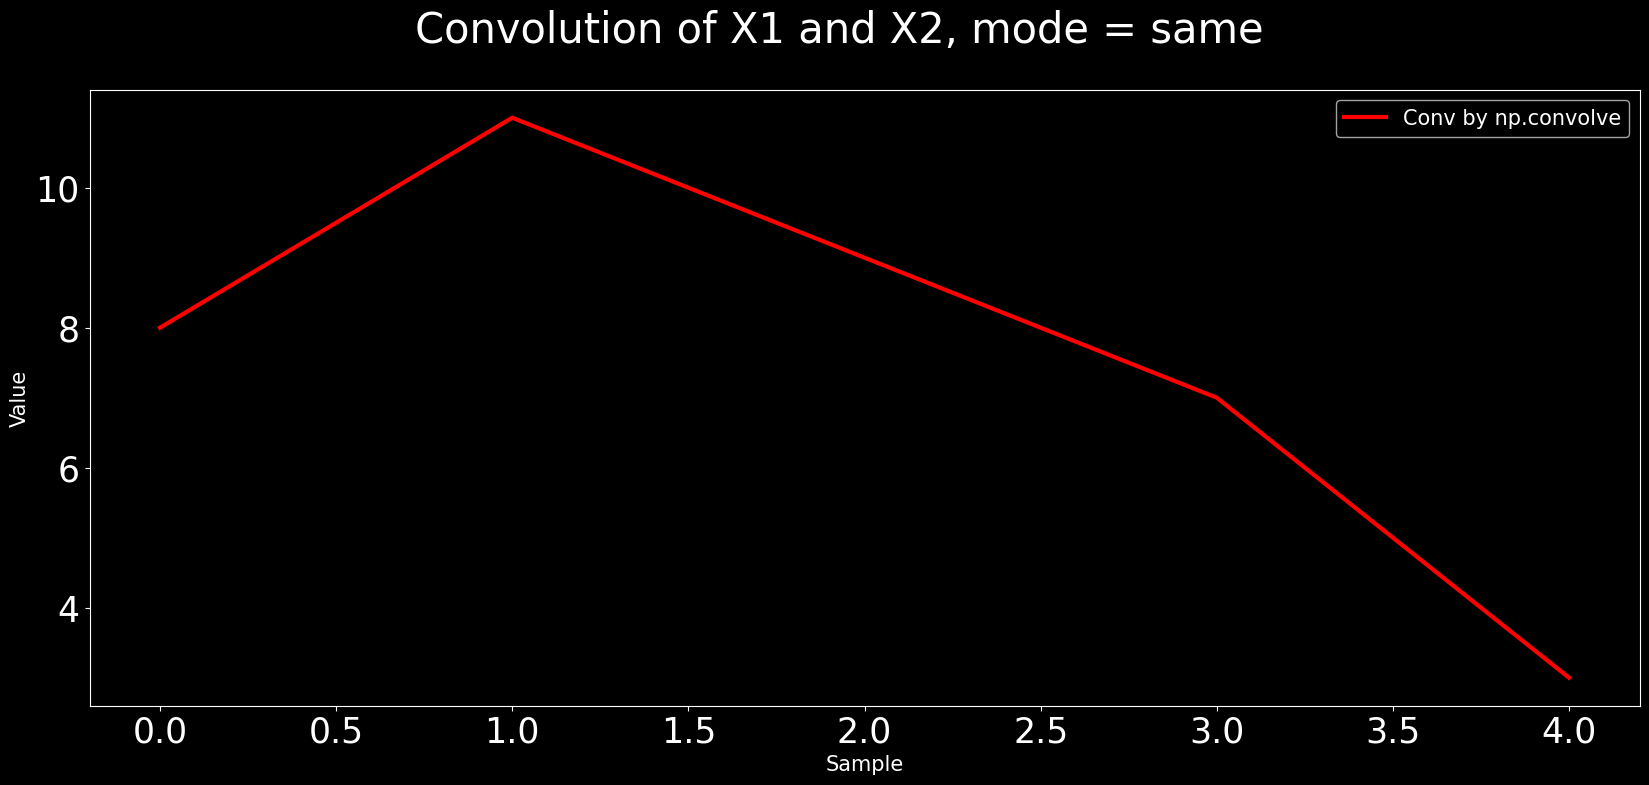

In [6]:
# Plotting convolution using for loops and np.convolve

plt.figure(figsize = (20,8)) # set the size of figure
plt.suptitle('Convolution of X1 and X2, mode = same', fontsize = 30)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(np.convolve(x1,x2, mode = 'same'), 'r-', linewidth =3,label = 'Conv by np.convolve')
plt.xlabel('Sample', fontsize = 15)
plt.ylabel('Value', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Applications of Convolution

## 1.  Denoising Using Convolution

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
# create signal
srate = 256 # Hz
t  = np.arange(0,3,1/srate)
pnts = len(t)

print(pnts)
print(t)


768
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.

In [9]:
# creating a noiseless signal
x = np.sin(2*np.pi * 2 * t)

# creating a random noise
noise  = 5 * np.random.randn(pnts)

# Adding noise on signal
Noisysignal = x + noise

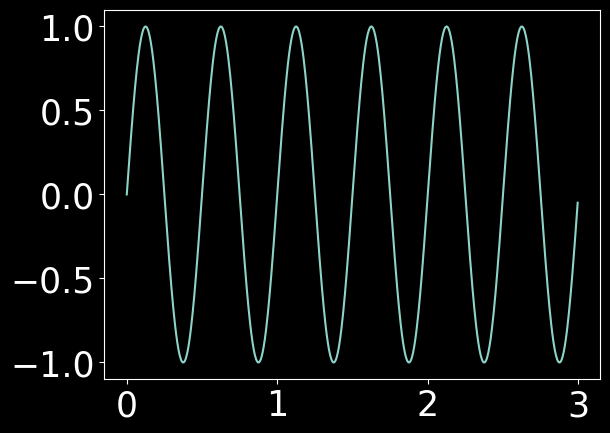

In [10]:
plt.plot(t, x)
plt.show()

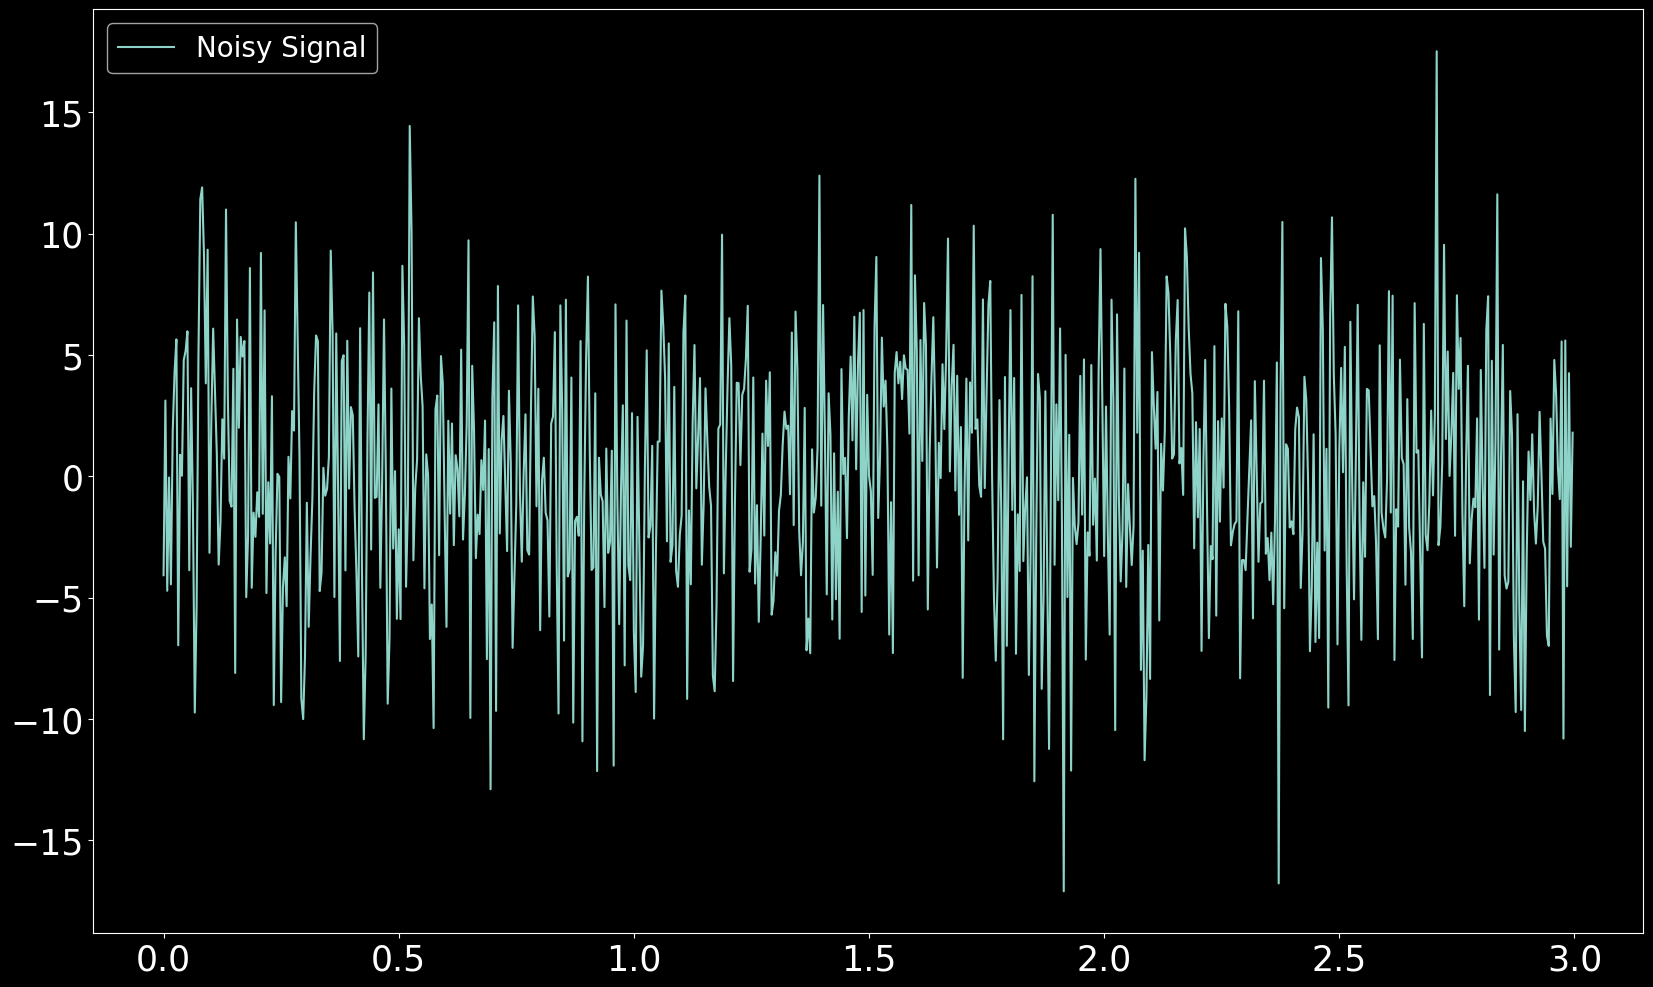

In [11]:
# Plotting Noisy Signal

plt.figure(figsize = (20,12))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t,Noisysignal, label = 'Noisy Signal')
plt.legend(fontsize = 20)
plt.show()

In [12]:
# Selecting filter for denoising

filter = 2*np.ones(50)/10  # Moving Average Filter
filter

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [13]:
# Filtering by convolution

filteredSignal = np.convolve(Noisysignal,filter, mode = 'same')

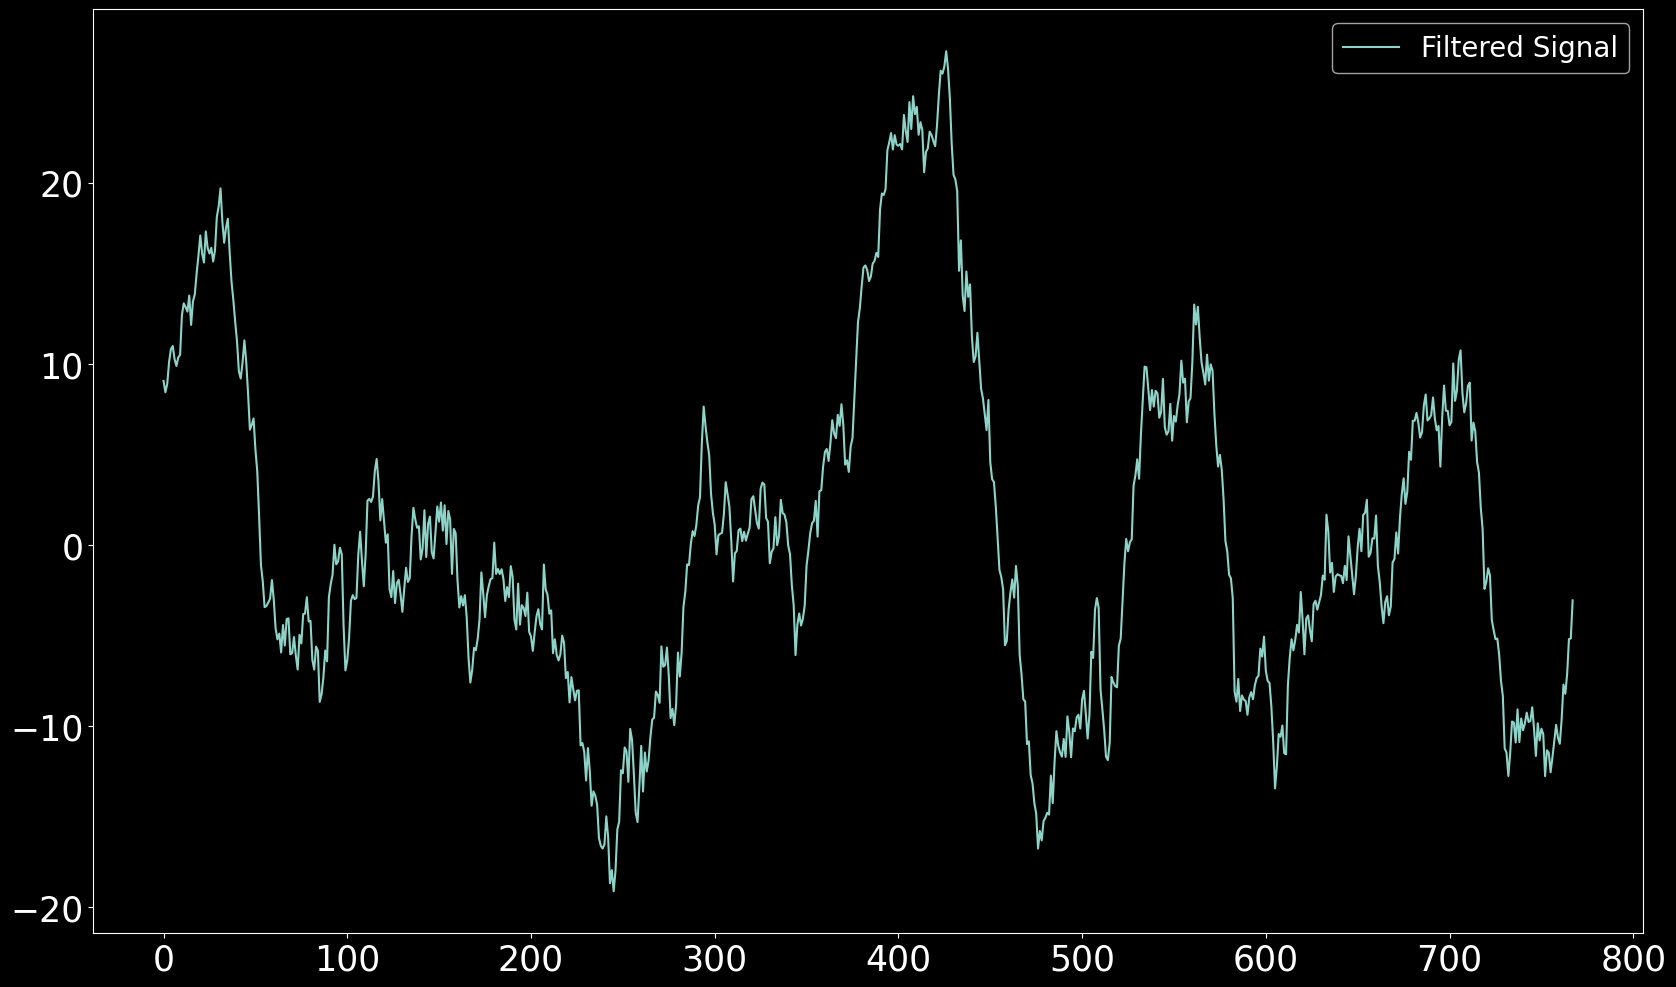

In [14]:
# Plotting filtered signal

plt.figure(figsize = (20,12))
plt.plot(filteredSignal, label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()

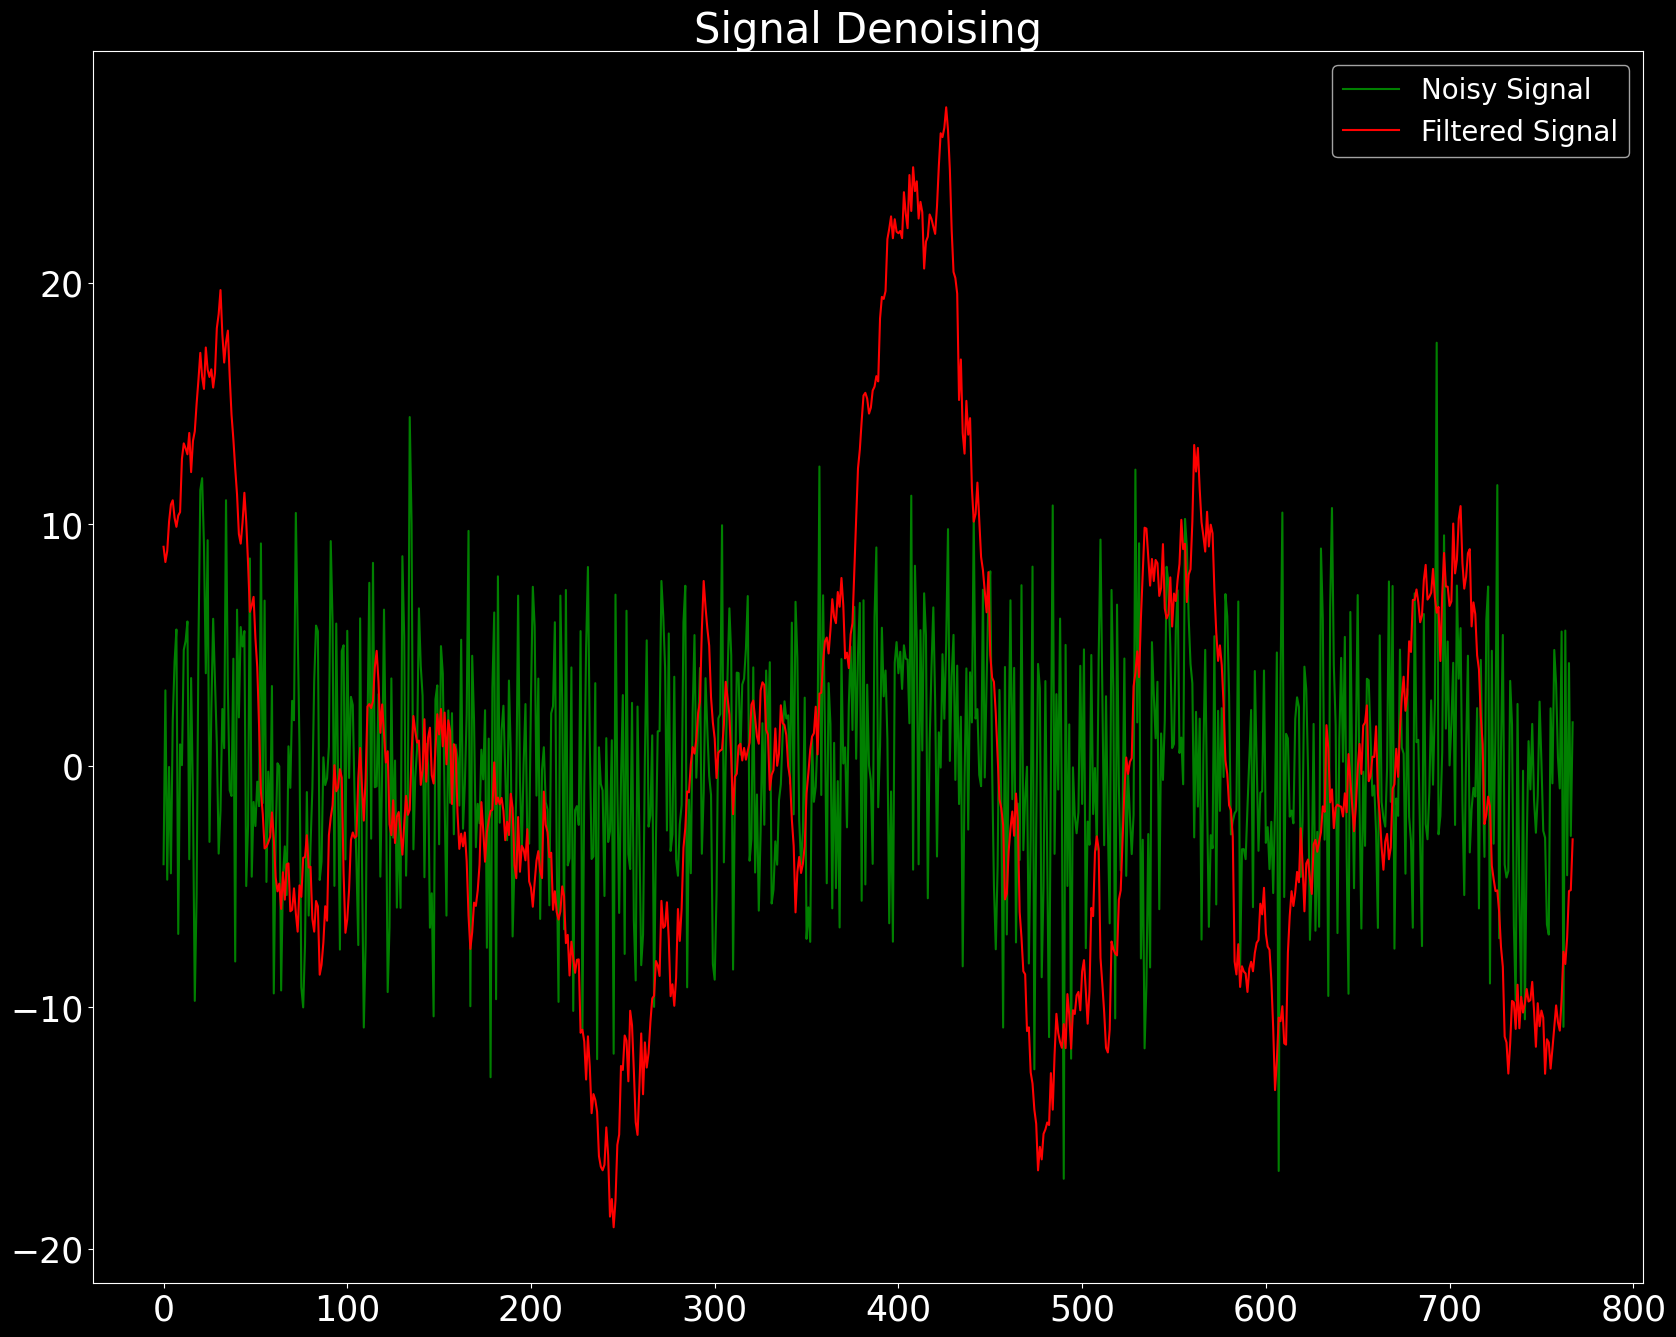

In [15]:
# Plotting Noisy signal and filtered signal

plt.figure(figsize = (20,16))
plt.plot(Noisysignal,'g', label = 'Noisy Signal')
plt.plot(filteredSignal,'r', label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.title('Signal Denoising', fontsize = 30)
plt.show()

## 2.  Edge Detection Using Convolution

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

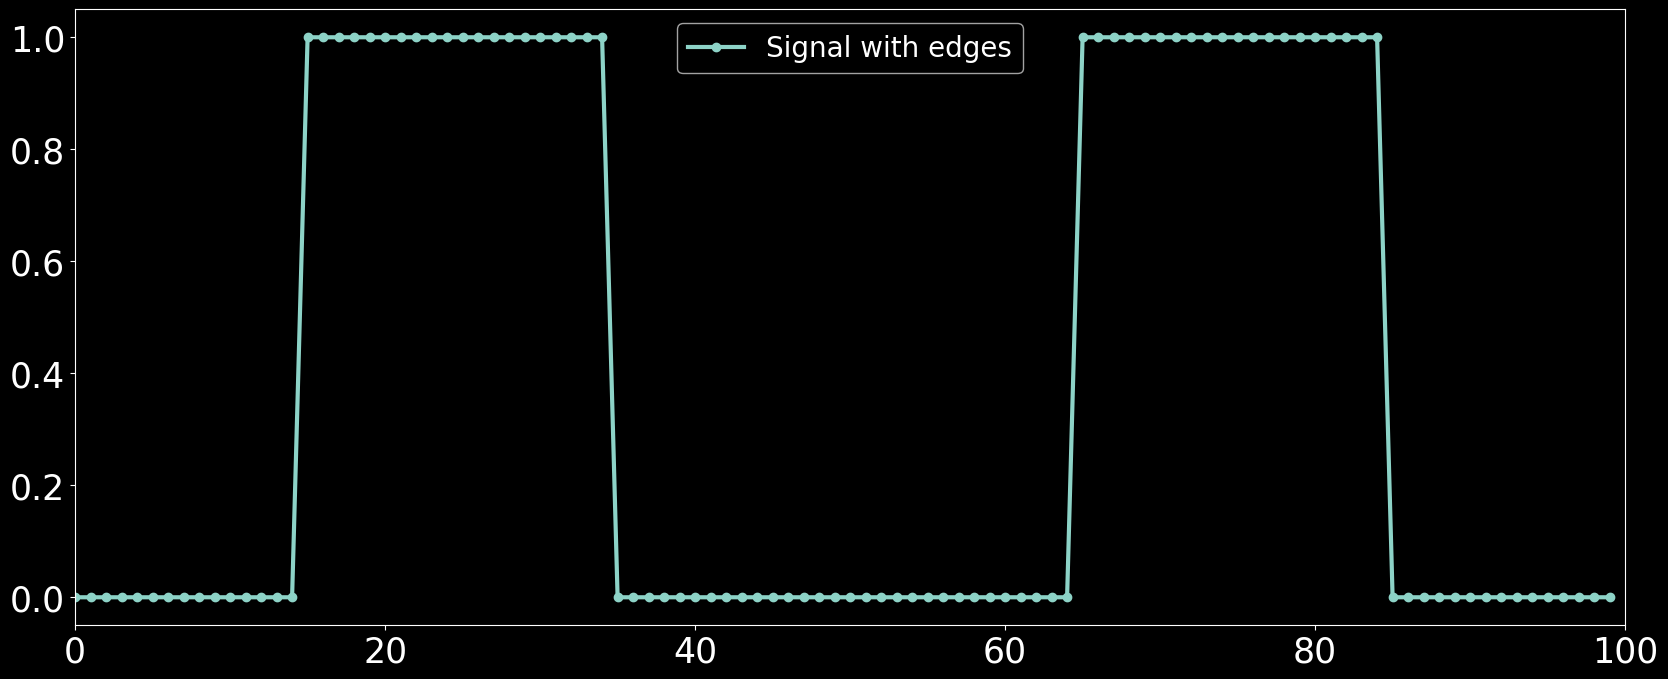

In [17]:
# Generating signal with edges

NewSig = np.zeros(100)
NewSig[15:35]=1
NewSig[65:85]=1
plt.figure(figsize = (20,8))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.xlim(0,100)
plt.plot(NewSig,'o-', linewidth = 3, label = 'Signal with edges')
plt.legend(fontsize = 20)
plt.show()


In [18]:
# Kernel for edge detection

kernel = np.array([0.5,0.3,0.1,0,-0.1,-0.3,-0.5])
kernel

array([ 0.5,  0.3,  0.1,  0. , -0.1, -0.3, -0.5])

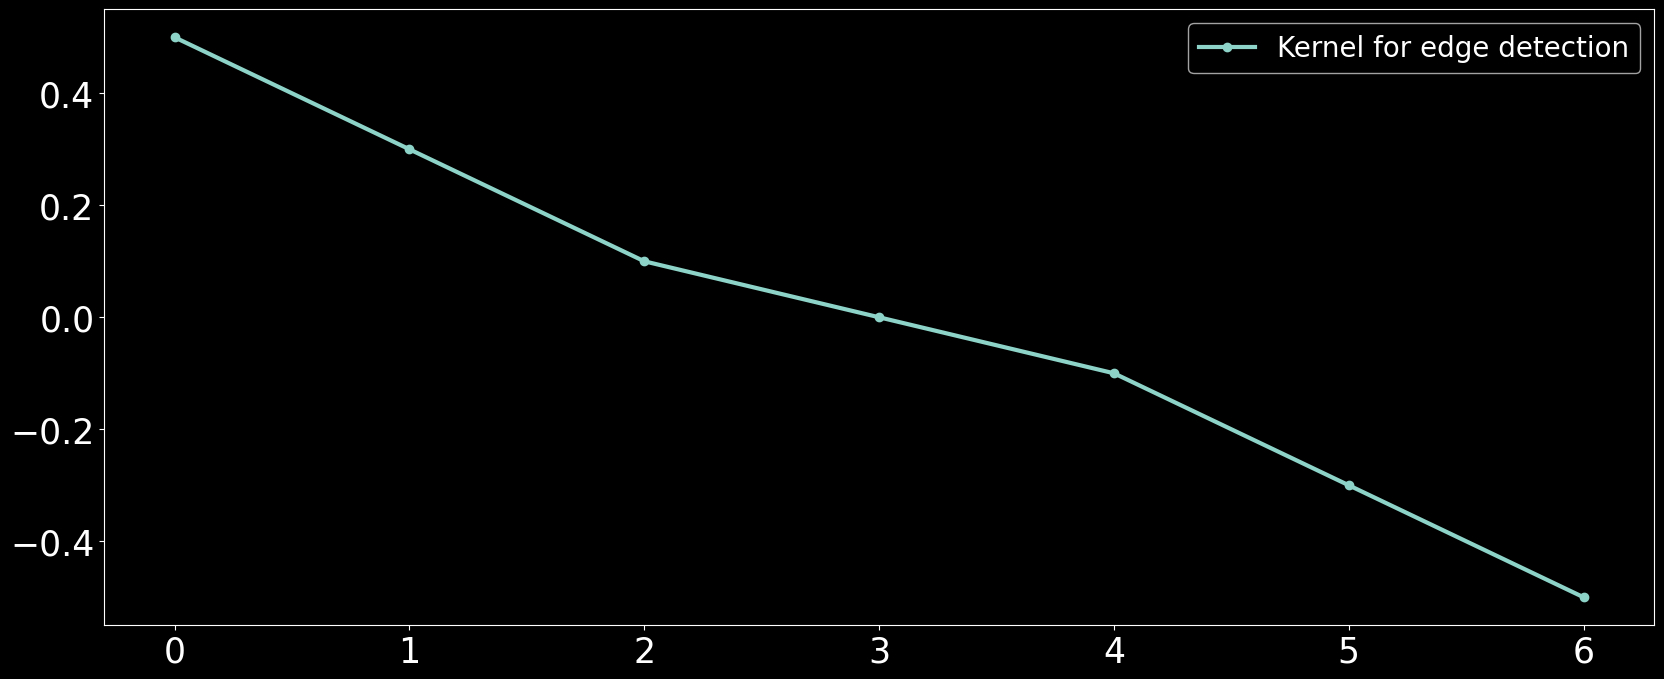

In [19]:
# Plotting the kernel

plt.figure(figsize = (20,8))
plt.plot(kernel,'o-', linewidth=3, label = 'Kernel for edge detection')
plt.legend(fontsize = 20)
plt.show()

In [20]:
# Performing edge detection by convolution

filt_sig = np.convolve(NewSig,kernel, mode = 'same')

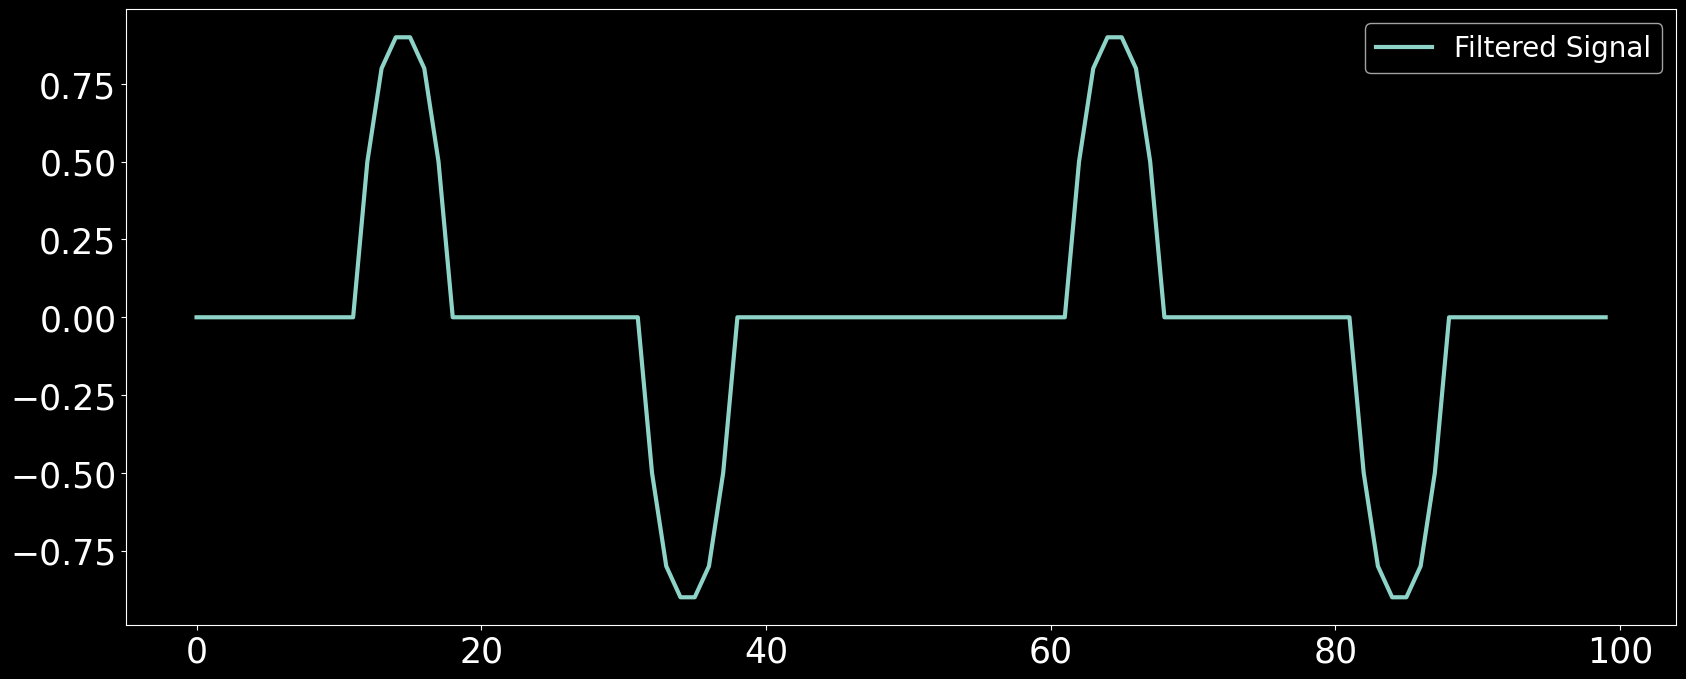

In [21]:
# Plotting Filtered Signal

plt.figure(figsize = (20,8))
plt.plot(filt_sig,linewidth =3, label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()

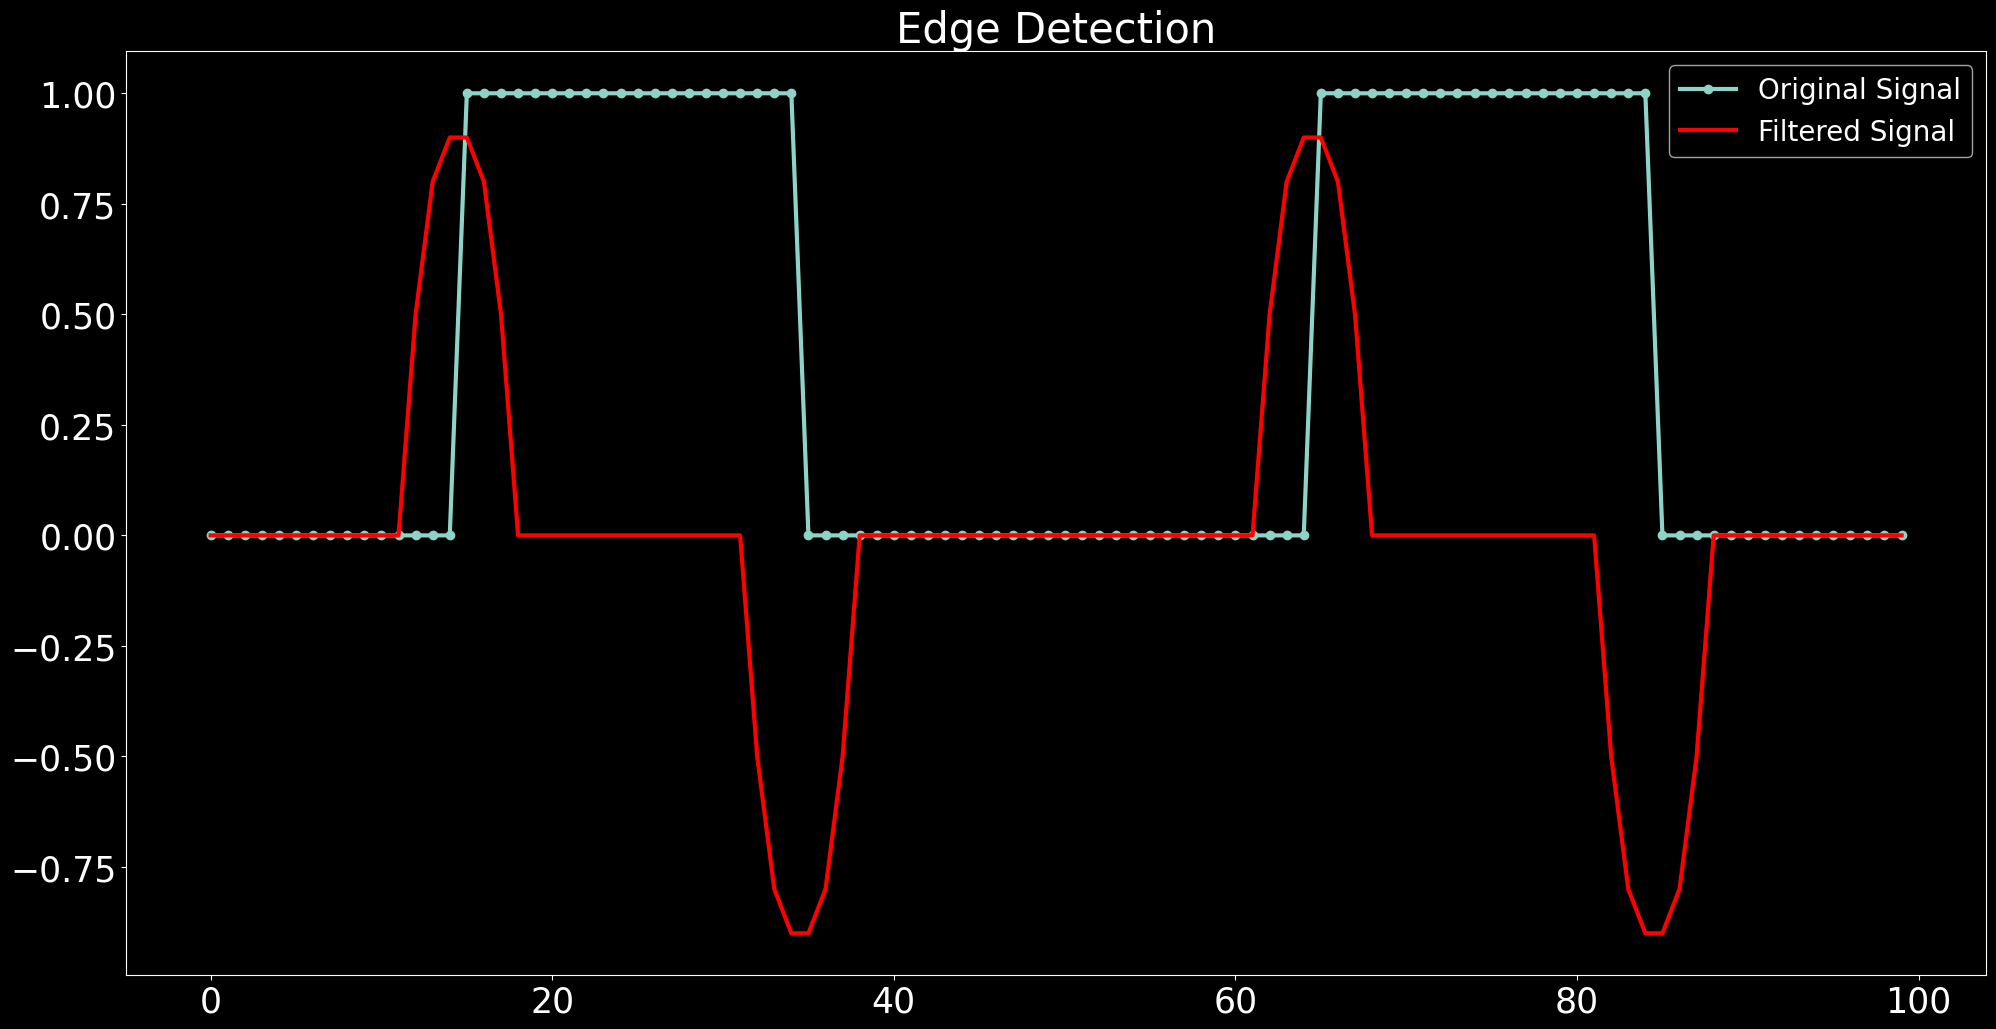

In [22]:
# Plotting original signal and filtered signal

plt.figure(figsize = (24,12))
plt.plot(NewSig,'o-', linewidth =3, label = 'Original Signal')
plt.plot(filt_sig,'r-',linewidth =3, label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.title('Edge Detection', fontsize = 30)
plt.show()

# The Convolution Theorem

### The convolution of two signals in time domain is equal to the point-wise multiplication of the signals in frequency domain.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [24]:
sig = np.array([1,2,2,1,1])
ker = np.array([3,2,1])

### Convolution in time domain

In [25]:
Time_dom = np.convolve(sig,ker)

In [26]:
Time_dom

array([ 3,  8, 11,  9,  7,  3,  1])

In [27]:
nconv = len(Time_dom)
print(nconv)

7


### Convolution in frequency domain

In [28]:
import scipy

ModuleNotFoundError: No module named 'scipy'

In [33]:
sigF = scipy.fft.fft(sig,nconv)
kerF = scipy.fft.fft(ker,nconv)

In [34]:
# Element-wise multiplication of signal and kernel
sigFFT = sigF * kerF

# Inverse FFT
Freq_dom = np.real( scipy.fft.ifft( sigFFT ) )
Freq_dom

array([ 3.,  8., 11.,  9.,  7.,  3.,  1.])

### Plotting time and frequency domain convolution

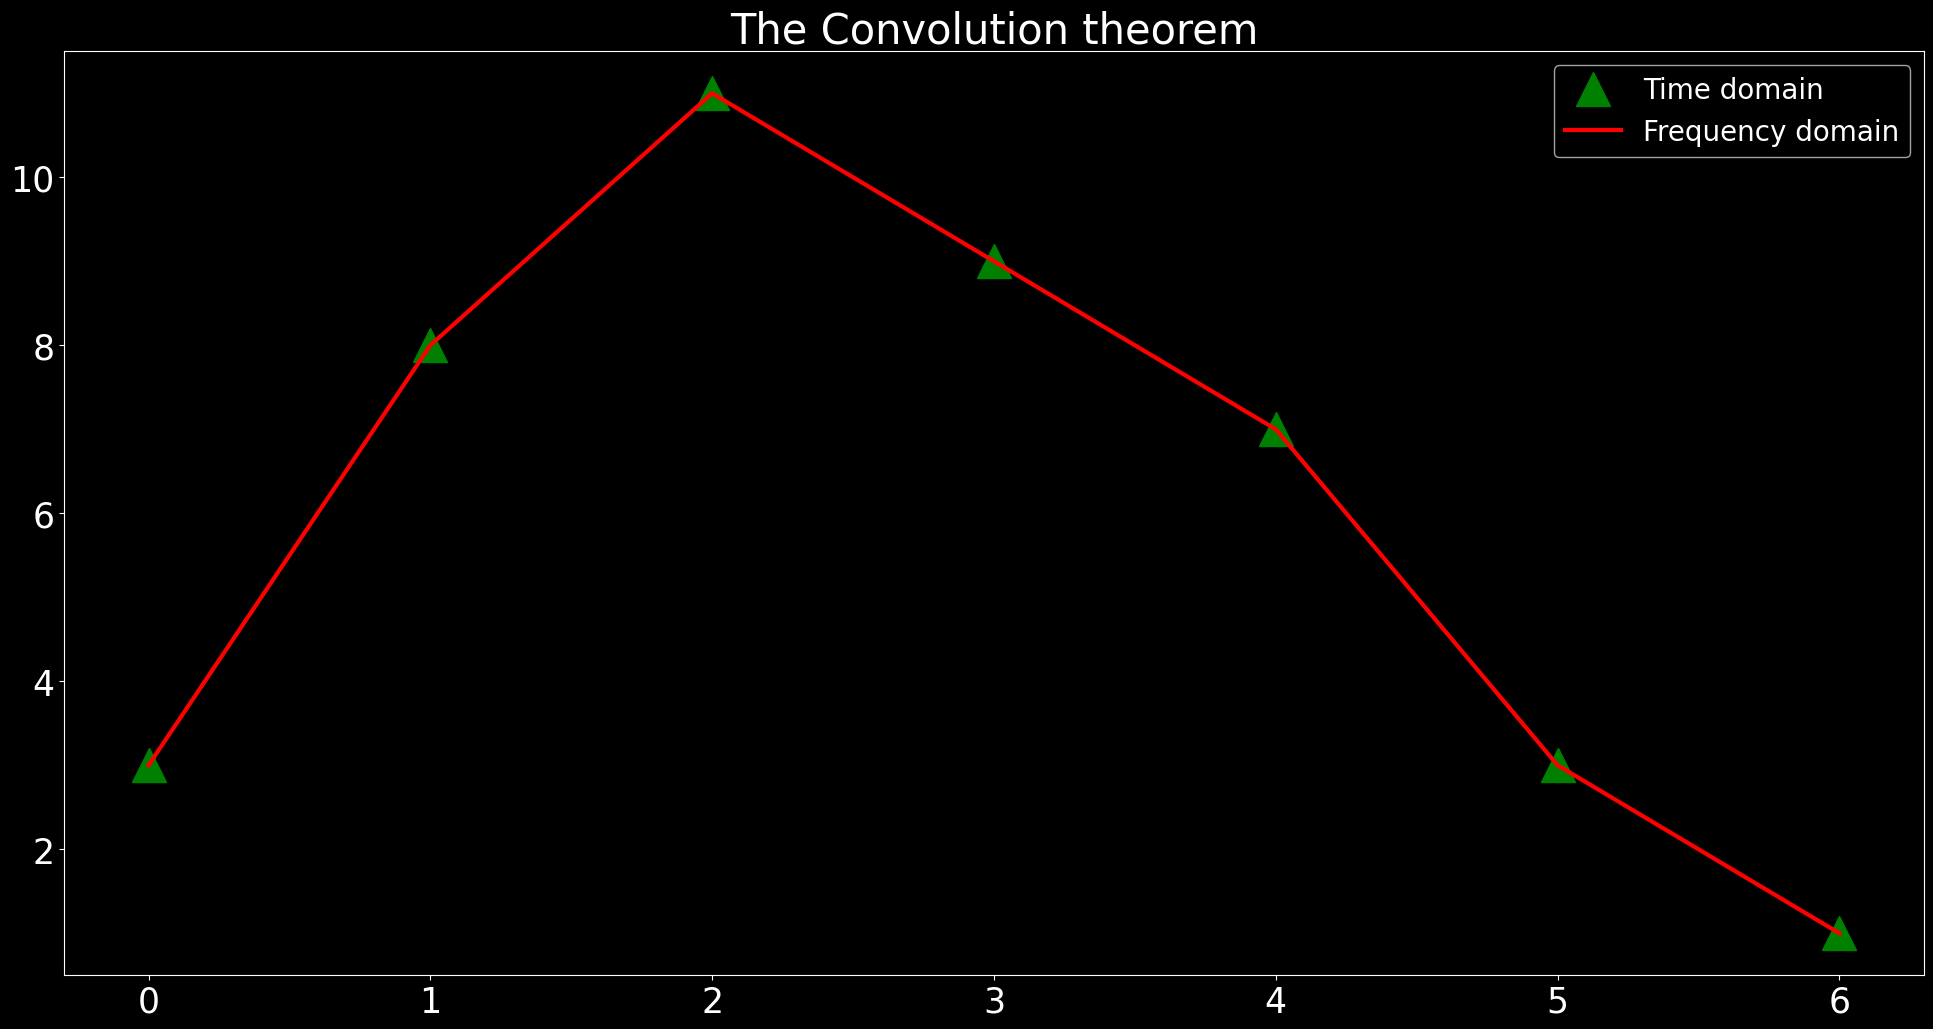

In [35]:
plt.figure(figsize = (24,12))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(Time_dom,'g^',markersize = 25, label='Time domain')
plt.plot(Freq_dom,'r-',linewidth =3, label='Frequency domain')
plt.legend(fontsize = 20)
plt.title('The Convolution theorem', fontsize = 30)
plt.show()